### Modelos de Atenção

A ideia de modelos de atenção é literalmente dar mais atenção a partes mais específicas de uma sentença. Isso em suma, permite a relacionar palavras em dois idiomas que se apresentam em posições distintas. Claro, o modelo não serve somente para sistemas de tradução, mas esse é um entendimento mais sucinto.

O mecanismo faz uso de representações de <b>keys</b> e <b>values</b> que são, respectivamente, representação da entrada (hidden states do codificador) e saída (hidden states do decodificador). Ambos tem dimenção $N$, de forma que $N$ é o tamanho da entrada.

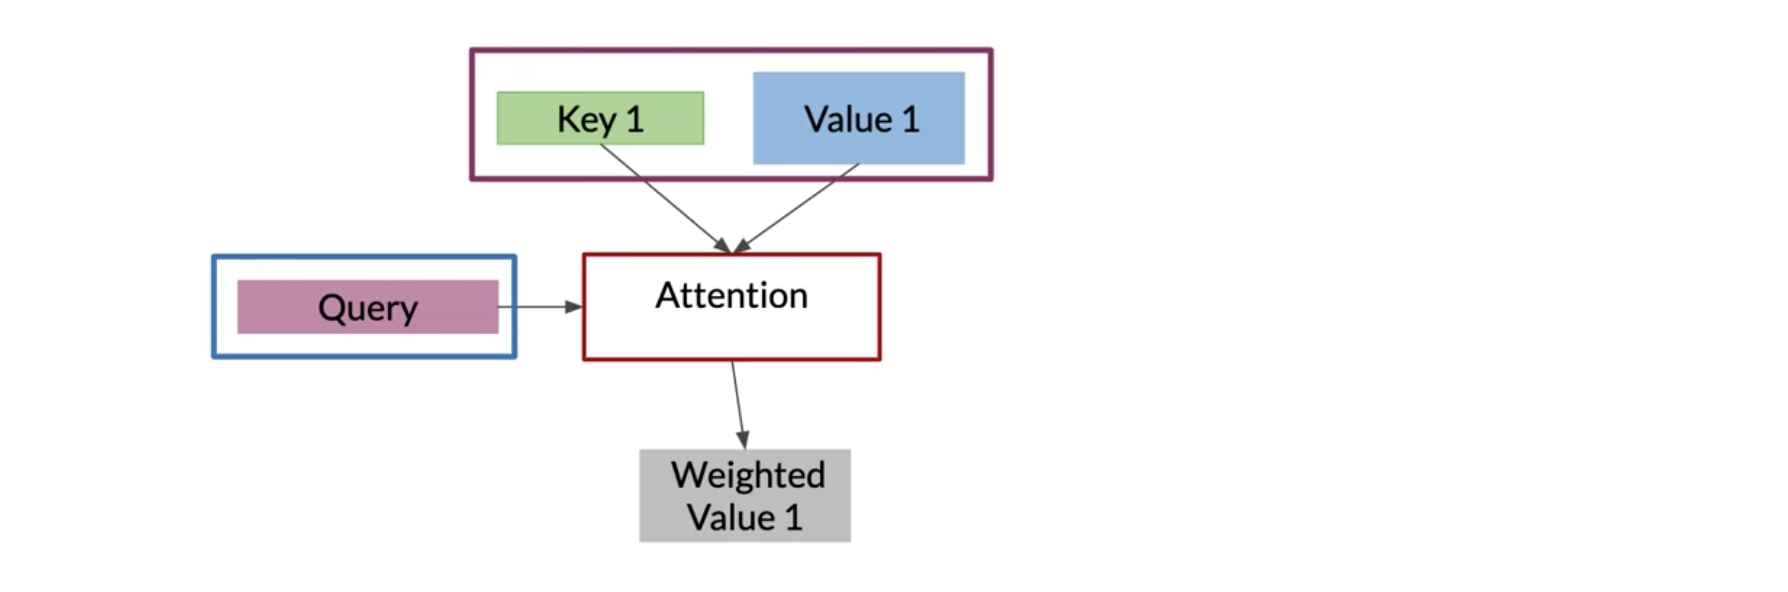

As <b>querys</b> vêem do decoder, isto é elas vão ser uma representação da sequência alvo. No caso de um sistema de tradução de inglês para alemão, as querys vão representar a sentença em alemão.

<b>Keys</b> e <b>values</b> tem suas resctivas matrizes, estas normalmente possuem os mesmos valores. Considerando o exemplo em que a embedding gerada de uma sentença em inglês é representada por essas chaves e valores. Agora realize um produto vetorial das <b>key</b> e da <b>query</b> e será obtido a similaridade entre ambos. Para tratarmos esse produto vetorial dentro de uma distribuição de probabilidade, usamos a Softmax da seguinte forma:

$$softmax(QV^{T})$$

Em seguida, multiplicamos por V, que neste exeplo representa o mesmo que K. 

$$softmax(QV^{T})V$$

Isso nos indica o quanto de cada palavra será usado para alimentar o decodificador para predizer a próxima palavra. Este modelo é chamado de Atenção de produto vetorial escalavel (t.l. Scaled Dot Product Attention).

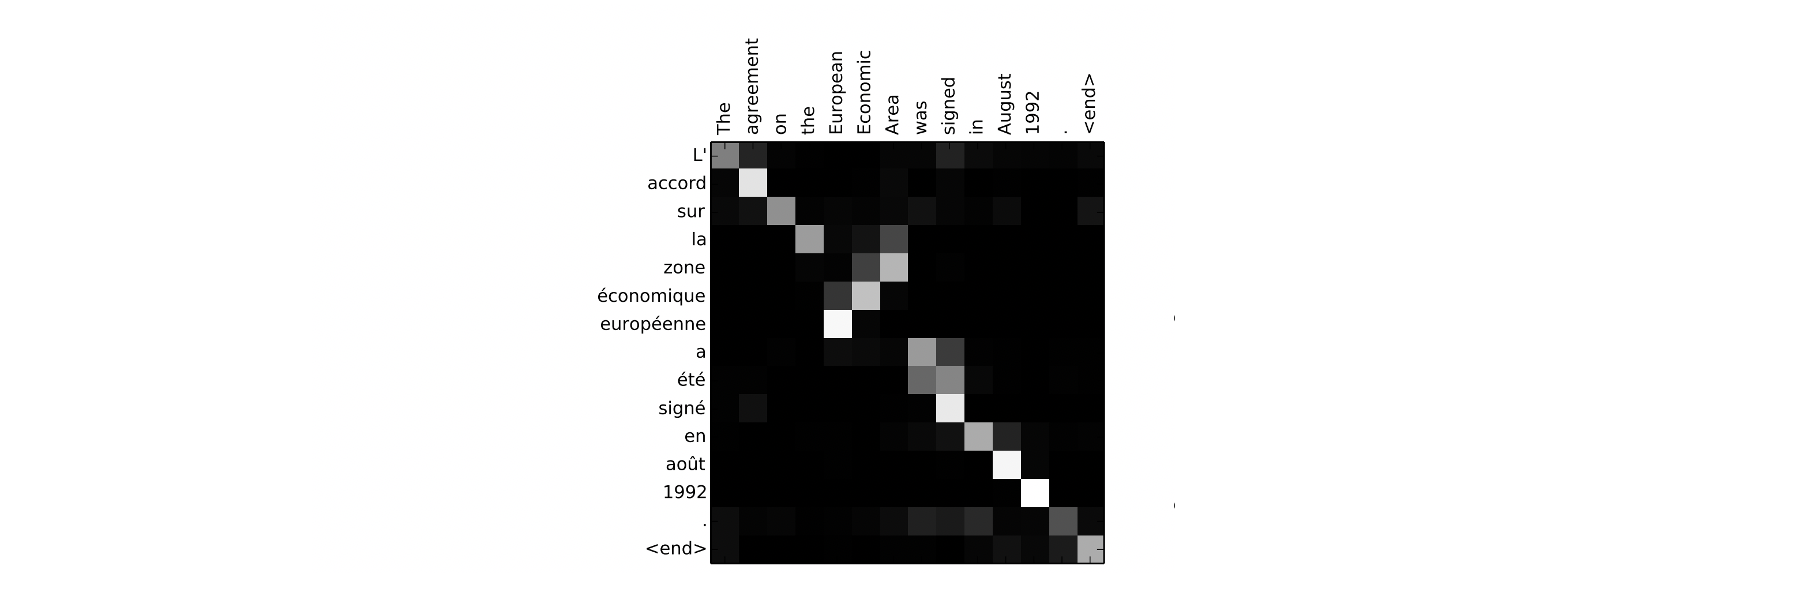

O exemplo demonstra o resultado, onde os maiores pesos são mais claros.


### Residual Network

Uma rede de resíduo realiza a operação estabelecida e mantém o residual de um valor de entrada.
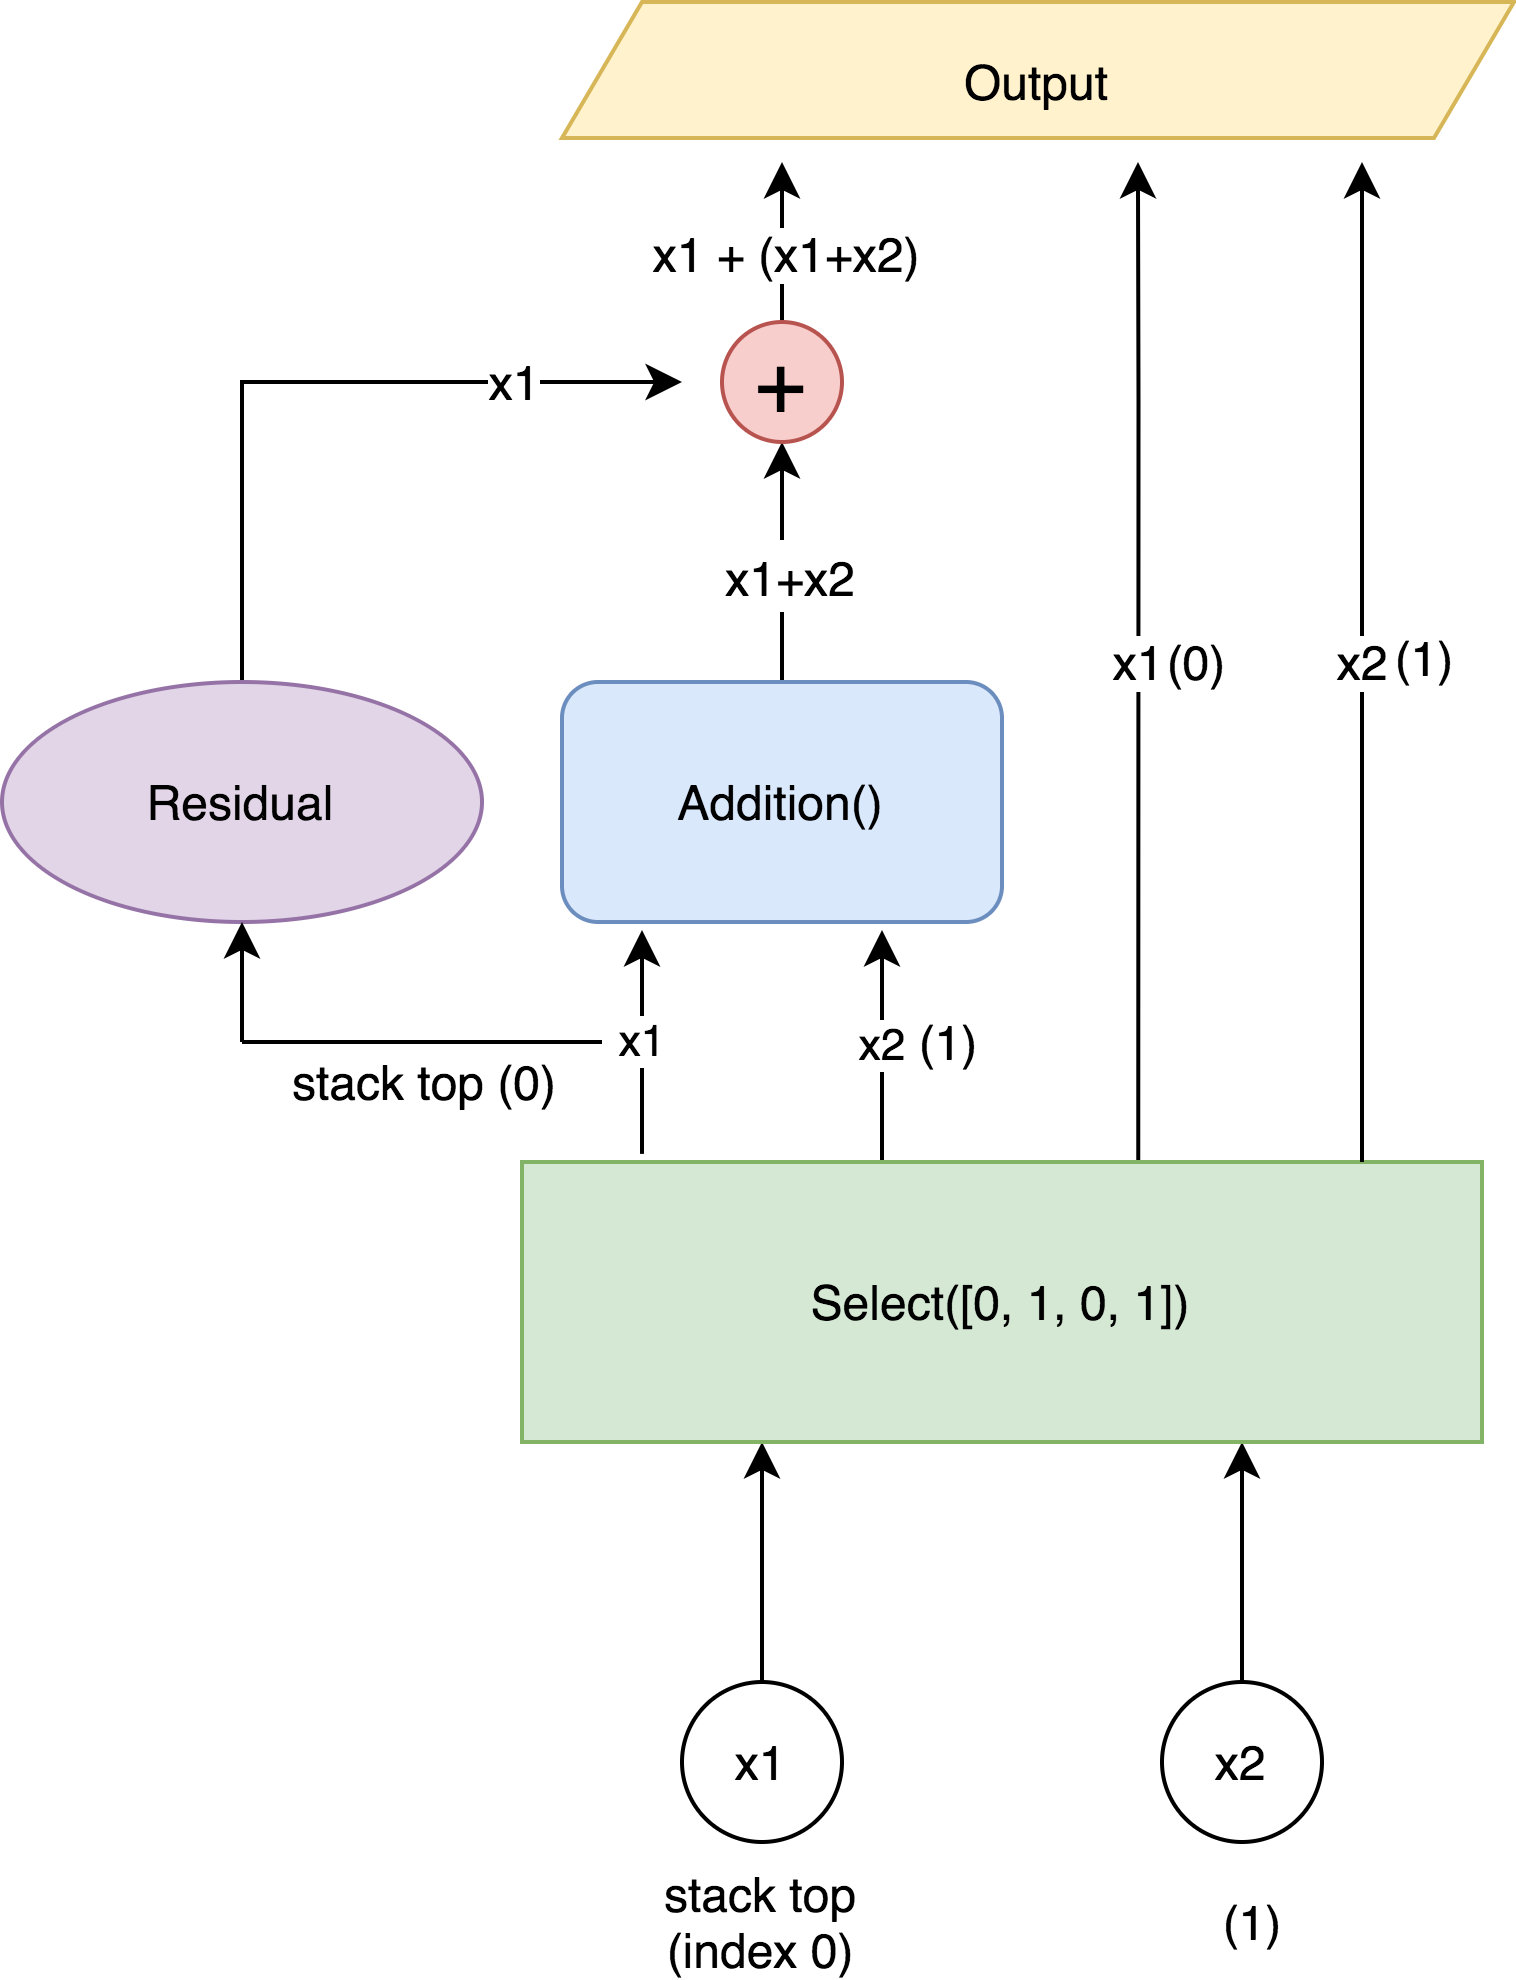</img>

Digamos que haja uma stack 10, 3, onde passará por uma operação de adição.

O resultante dessa stack é 13,

Agora dada a mesma stack, se aplicarmos uma camada residual que contém a adição teremos 13, 3 como saída.

Isto significa que o resíduo é mantido para próxima camada.

### Treinando um Neural Translation System NTS

O modelo aqui apresentado usa ambos conceitos, de camada de atenção e de camada residual. A figura abaixo representa esse modelo:
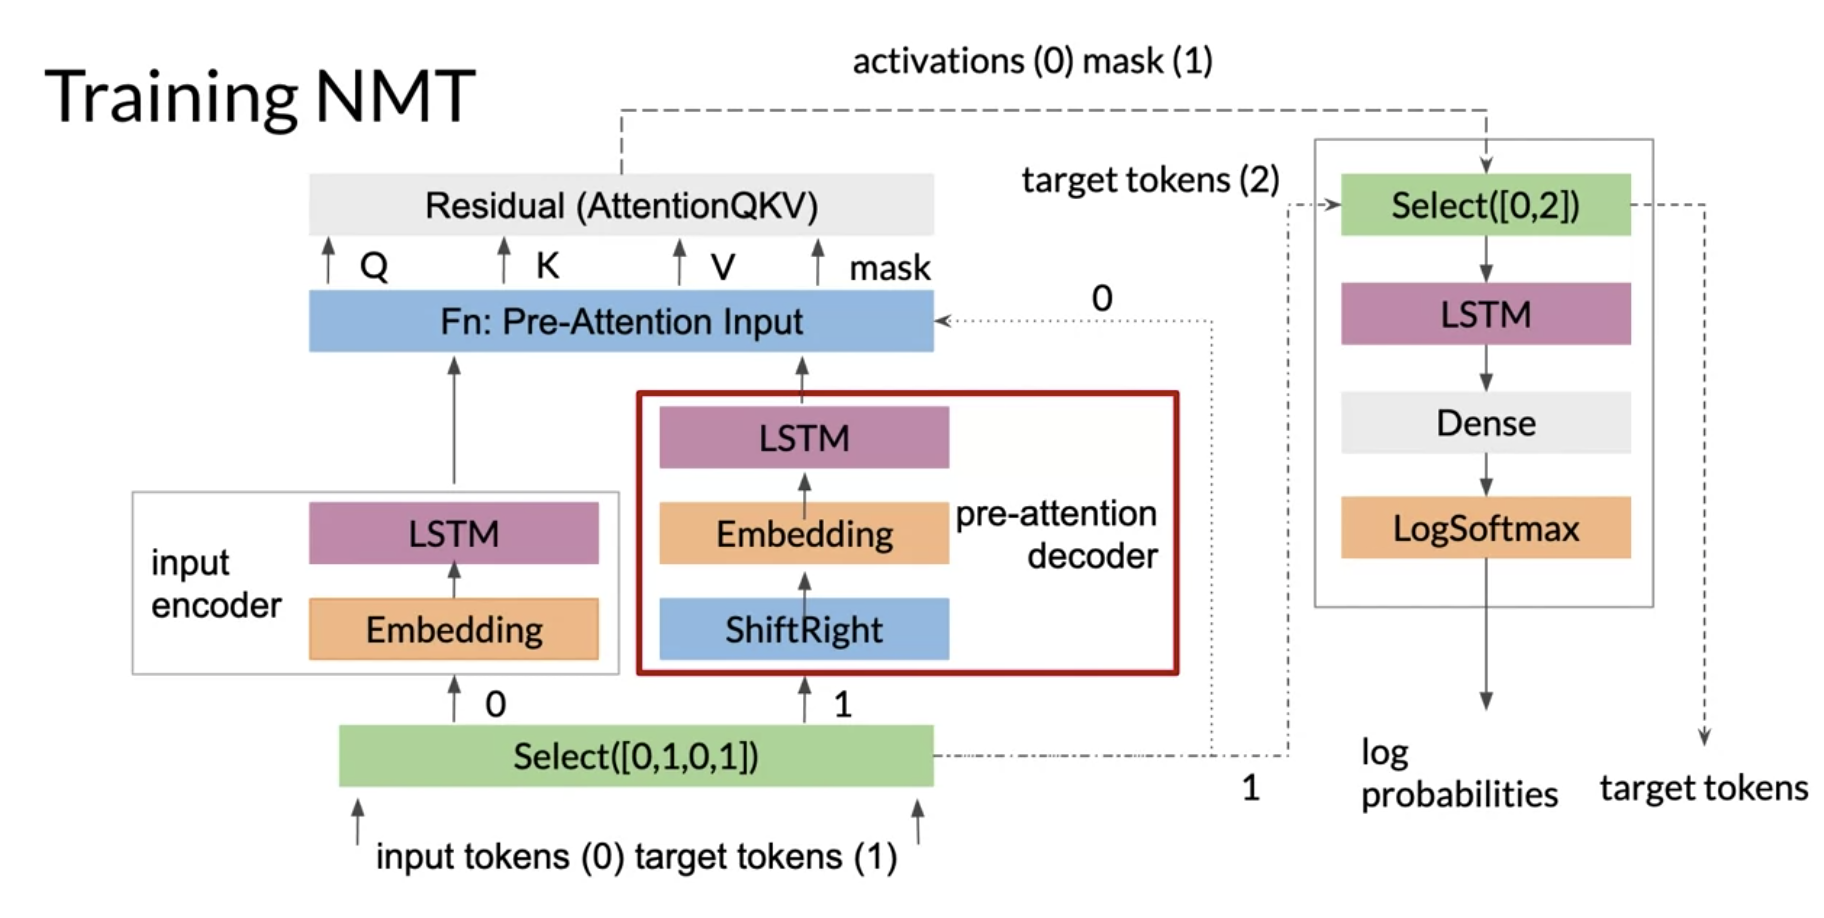

Primeiro lugar, quem é nossa entrada? Nossa entrada consiste é composta por duas sentenças tokenizadas. Uma na lingua fonte e outra na lingua alvo. A língua fonte é representada por 0, e a língua alvo é representada por 1.

Dos quatro inputs gerados na figura, o primeiro input será utilizado para definir as <b>keys</b> e <b>values</b> (no encoder) e o segundo par será para um modelo que precede o de atenção no decoder. O terceiro serve para tratar a entrada antes do modelo de atenção, que recebe a saída do input encoder e pre-attention decoder. O quarto que é justamente a sentença tokenizada no idioma alvo, é recebido como entrada juntamente com as ativações para treinar a ultima parte do modelo.

O modelo pre-attention serve para transformar os vetores em outro espaço vetorial, o <b>vetor query</b>.

Esses 4 elementos resultantes Q, K, V e mask, passam pela transformação na camada de atenção, mantendo somente a mask através da rede residual e passando para a próxima camada.

### Validação

Tratando-se de validação, em suma, duas métricas são úteis para medir a precisão de um modelo NMT. 

$$Blue(prediction,label) = \frac{len(unique(n\_grams(prediction)))}{total\_of\_words(label)}$$

Outra métrica a se considerar é a ROUGE que se divide em precisão e recall

$$ROUGE_{r}(prediction,label) = \frac{len(overlapping(n\_grams(prediction),n\_grams(label)))}{total\_of\_words(label)}$$

$$ROUGE_{p}(prediction,label) = \frac{len(overlapping(n\_grams(prediction),n\_grams(label)))}{total\_of\_words(prediction)}$$

Obs: o método $overlapping$ retorna o conjunto de ngramas presente em ambos os conjuntos.